In [1]:
%matplotlib widget

In [2]:
import numpy as np
import matplotlib.pyplot as plt
# from matplotlib.colors import LogNorm
import os, glob

import seaborn as sns
mako = sns.color_palette("mako", as_cmap=True)

plt.rcParams['figure.dpi'] = 150
plt.ioff()

In [3]:
data = {} # data[L, p] contains (fail_rate, density)
for f in glob.glob('data/run_11/run_11_*.npy'):
    n = int(f.split("_")[3].split(".")[0])
    L = int(100 * (n // 11 + 1)) # L = 100, 200, 300, 400, 500
    p_error = ((n % 11) + 35) / 10000 # p_error = 0.0035, 0.0036, ..., 0.0045
    data[L, p_error] = np.load(f)

In [6]:
data_array = np.empty((5, 2))
for i, L in enumerate([100, 200, 300, 400, 500]):
    data_array[i] = data[L, 0.0035]

In [7]:
fail_rate = data_array[:, 0]
samples = data_array[:, 1]
error = np.sqrt(fail_rate * (1 - fail_rate) / samples)

In [8]:
L_ticks = np.linspace(100, 500, 5).astype(int)

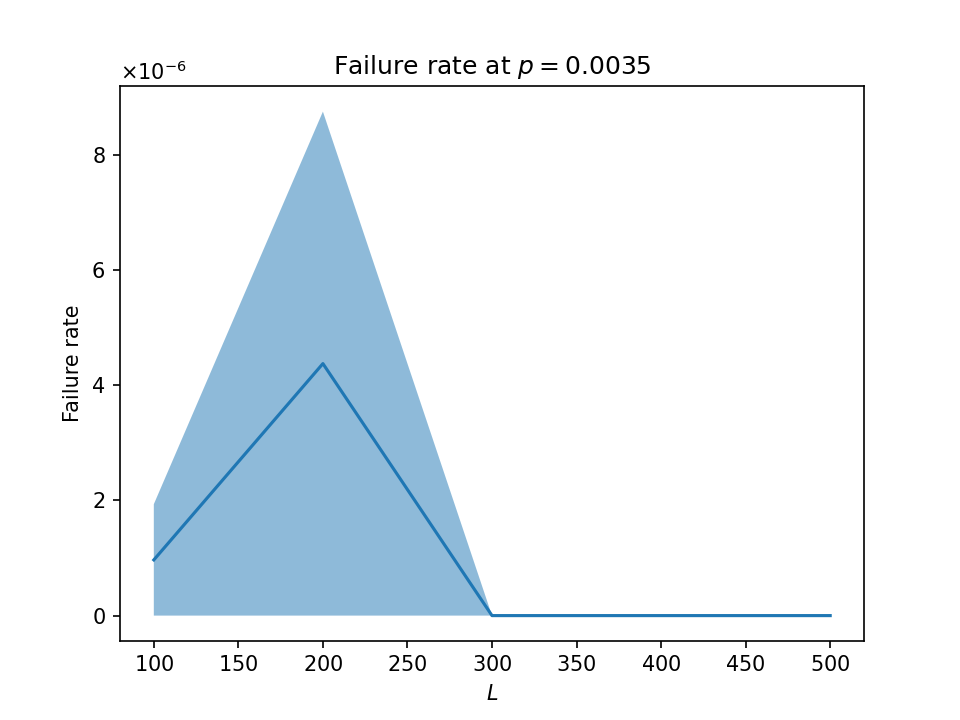

In [12]:
plt.clf()

plt.plot(L_ticks, fail_rate)
plt.fill_between(L_ticks, fail_rate-error, fail_rate+error, alpha = 0.5)

plt.title("Failure rate at $p=0.0035$")
plt.xlabel("$L$")
plt.ylabel("Failure rate")
# plt.xticks()
plt.ticklabel_format(scilimits = (-3, 3), useMathText = True)
plt.savefig("plots/run11_fail_linear.png")
plt.show()

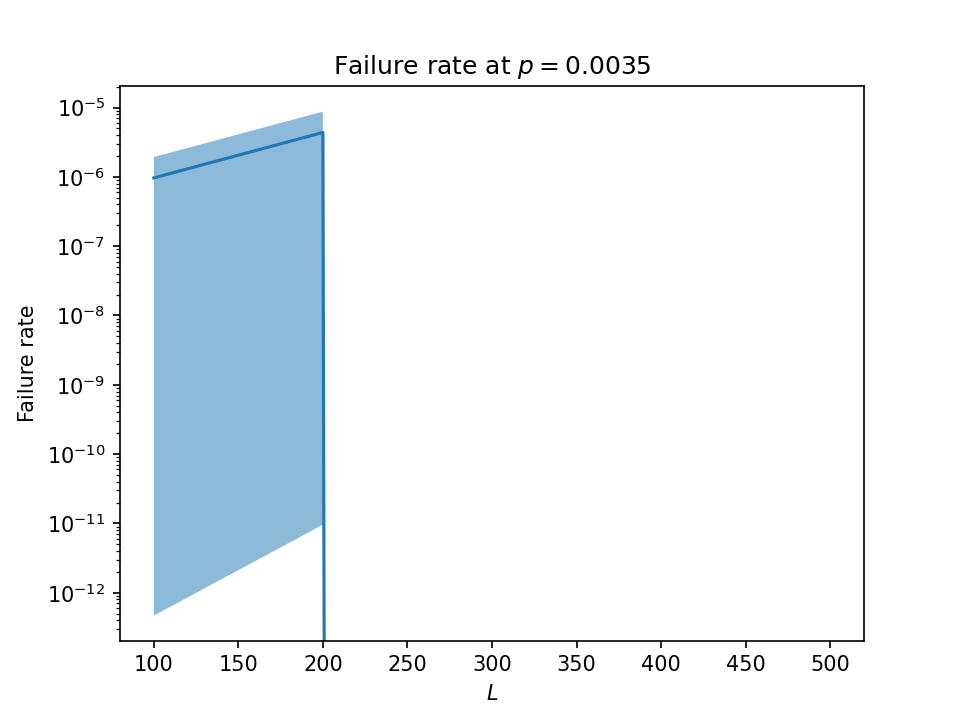

In [13]:
plt.clf()

plt.plot(L_ticks, fail_rate)
plt.fill_between(L_ticks, fail_rate-error, fail_rate+error, alpha = 0.5)

plt.title("Failure rate at $p=0.0035$")
plt.xlabel("$L$")
plt.ylabel("Failure rate")
# plt.xticks()
plt.yscale("log")
# plt.ticklabel_format(scilimits = (-3, 3), useMathText = True)
plt.savefig("plots/run11_fail_log.png")
plt.show()